In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.optimizers import SGD
from keras.utils import to_categorical

In [3]:
df = pd.read_csv('../input/train.csv')

In [5]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df1 = df.sample(frac=1)
train = df1.iloc[:int(0.6*len(df1))]
valid = df1.iloc[int(0.6*len(df1)):int(0.8*len(df1))]
test = df1.iloc[int(0.8*len(df1)):]

In [9]:
df["label"].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [11]:
len(df["label"].unique())

10

In [13]:
def scale_dataset(dataframe, oversample=False):
    x = dataframe[dataframe.columns[1:]].values
    y = dataframe[dataframe.columns[0]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(x)
    y = to_categorical(y)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, y))

    return data, X, y

In [15]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

Neural Network

In [18]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Categorical crossentropy')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)
    
    plt.show()

In [20]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = keras.Sequential([
    keras.layers.Dense(num_nodes, activation='relu', input_shape=(784,), kernel_initializer='he_uniform'),
    keras.layers.Dropout(dropout_prob),
    keras.layers.Dense(num_nodes, activation='relu'),
    keras.layers.Dropout(dropout_prob),
    keras.layers.Dense(10, activation='softmax')
    ])
    nn_model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy',
              metrics=['accuracy'])
    history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
)
    return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


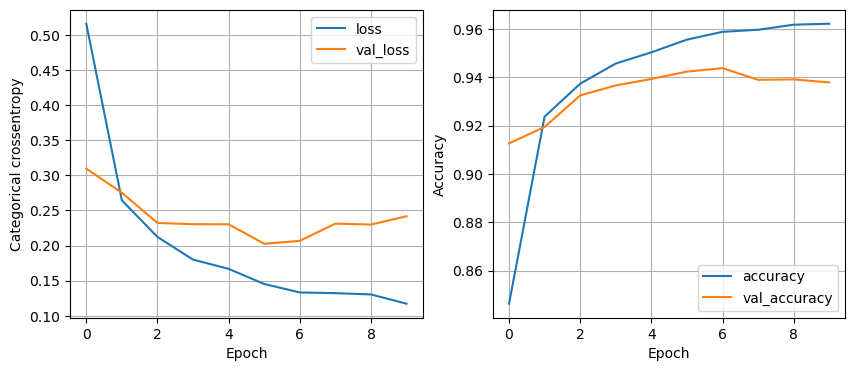

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.9336 - loss: 0.3165
16 nodes, dropout 0, lr 0.01, batch size 64


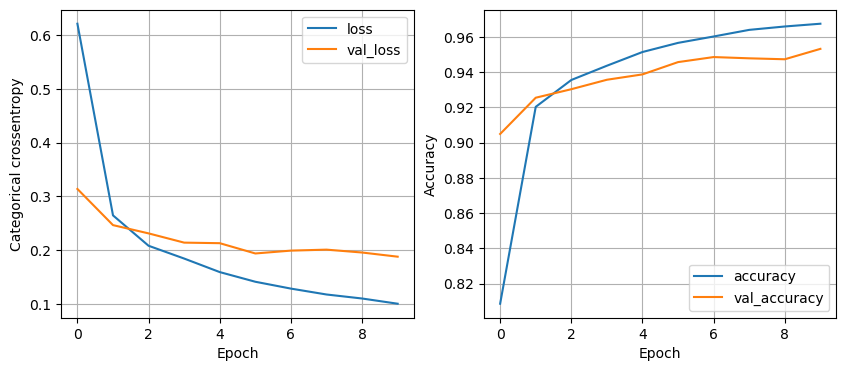

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step - accuracy: 0.9402 - loss: 0.2282
16 nodes, dropout 0, lr 0.01, batch size 128


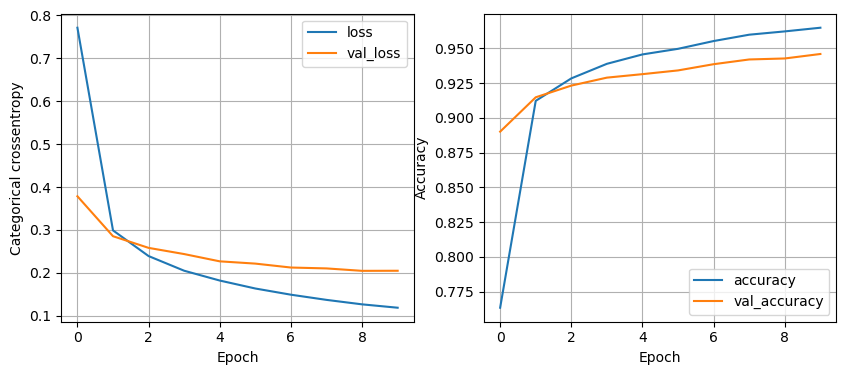

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - accuracy: 0.9410 - loss: 0.2303
16 nodes, dropout 0, lr 0.005, batch size 32


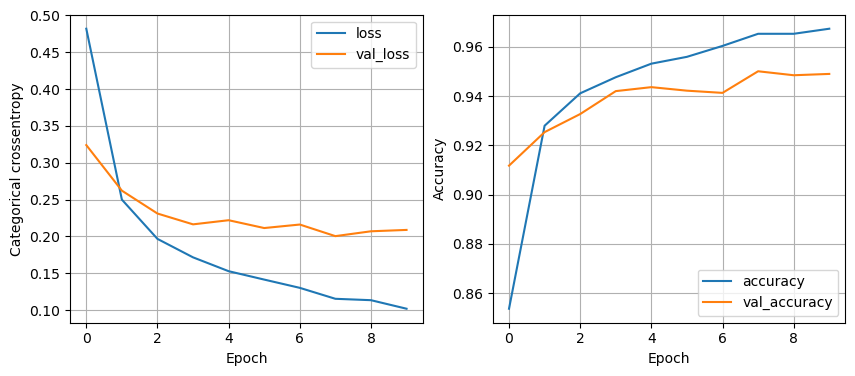

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 202us/step - accuracy: 0.9339 - loss: 0.2782
16 nodes, dropout 0, lr 0.005, batch size 64


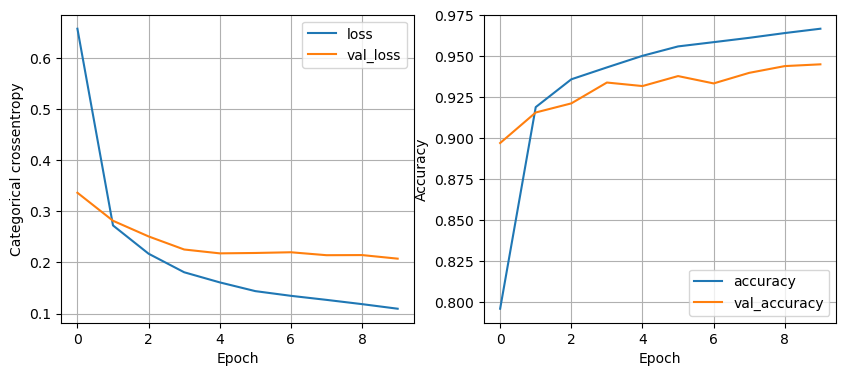

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - accuracy: 0.9386 - loss: 0.2511
16 nodes, dropout 0, lr 0.005, batch size 128


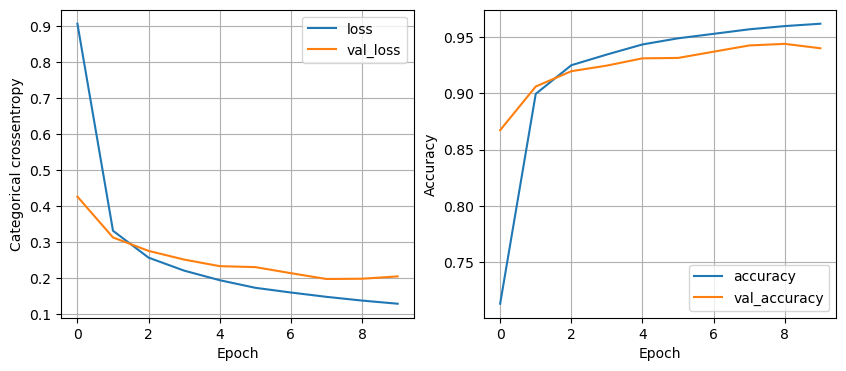

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step - accuracy: 0.9365 - loss: 0.2767
16 nodes, dropout 0, lr 0.001, batch size 32


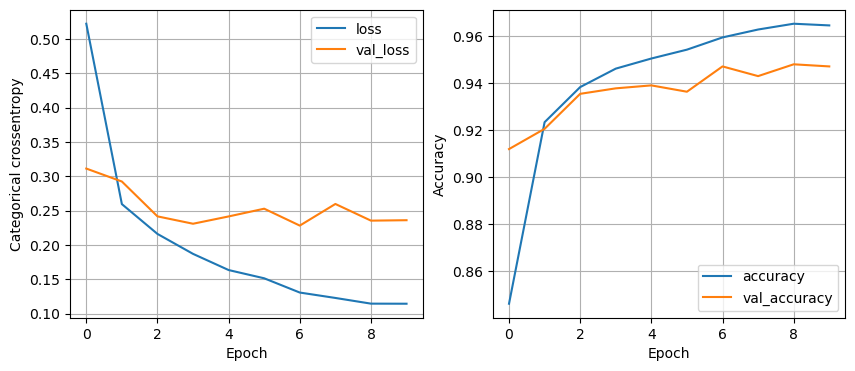

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step - accuracy: 0.9384 - loss: 0.2981
16 nodes, dropout 0, lr 0.001, batch size 64


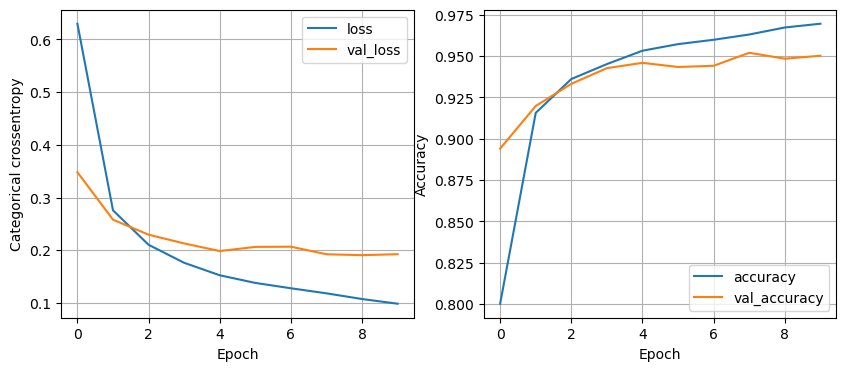

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 195us/step - accuracy: 0.9345 - loss: 0.2639
16 nodes, dropout 0, lr 0.001, batch size 128


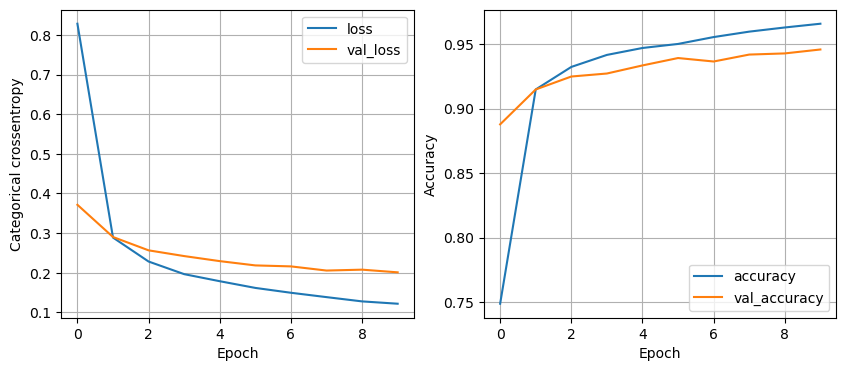

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 195us/step - accuracy: 0.9421 - loss: 0.2392
16 nodes, dropout 0.2, lr 0.01, batch size 32


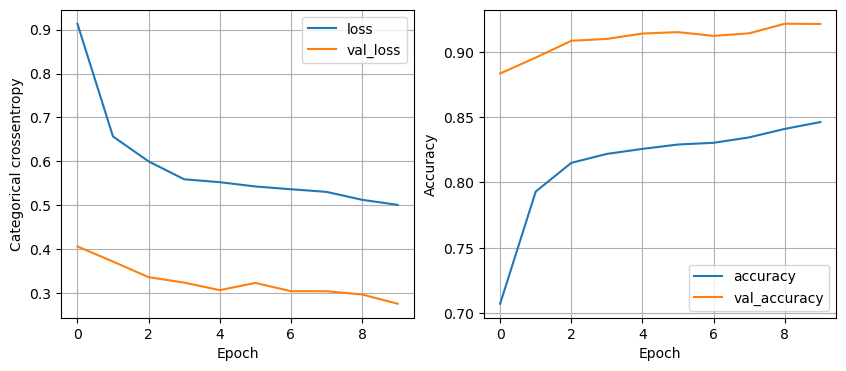

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 199us/step - accuracy: 0.9199 - loss: 0.3228
16 nodes, dropout 0.2, lr 0.01, batch size 64


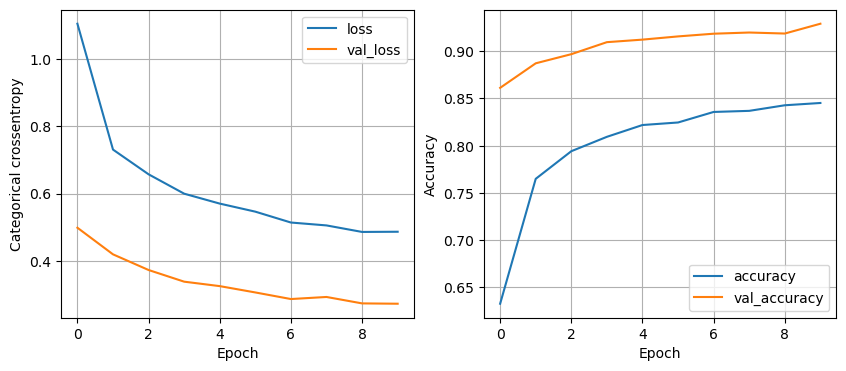

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 199us/step - accuracy: 0.9305 - loss: 0.2888
16 nodes, dropout 0.2, lr 0.01, batch size 128


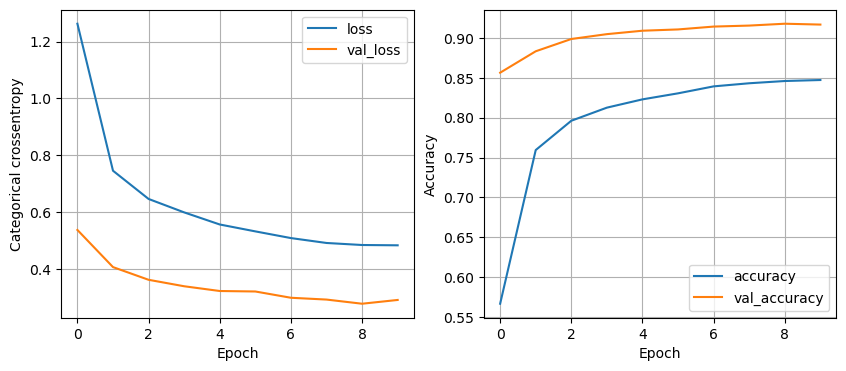

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 196us/step - accuracy: 0.9205 - loss: 0.2908
16 nodes, dropout 0.2, lr 0.005, batch size 32


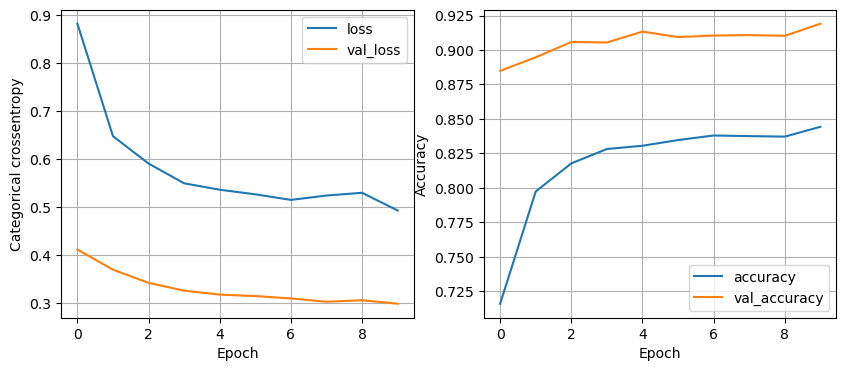

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 190us/step - accuracy: 0.9184 - loss: 0.3181
16 nodes, dropout 0.2, lr 0.005, batch size 64


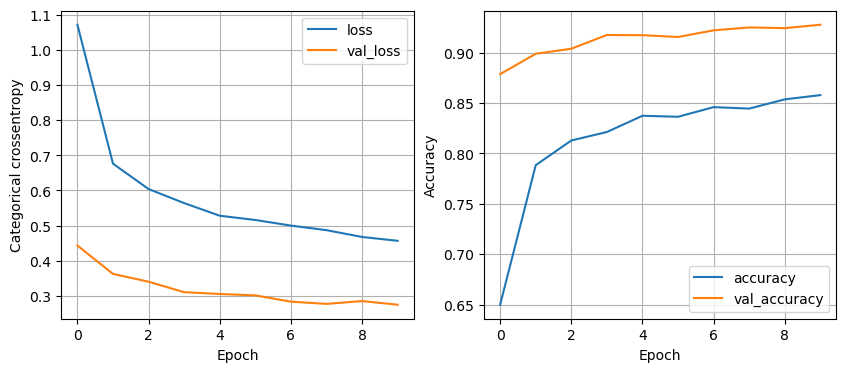

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 194us/step - accuracy: 0.9325 - loss: 0.2926
16 nodes, dropout 0.2, lr 0.005, batch size 128


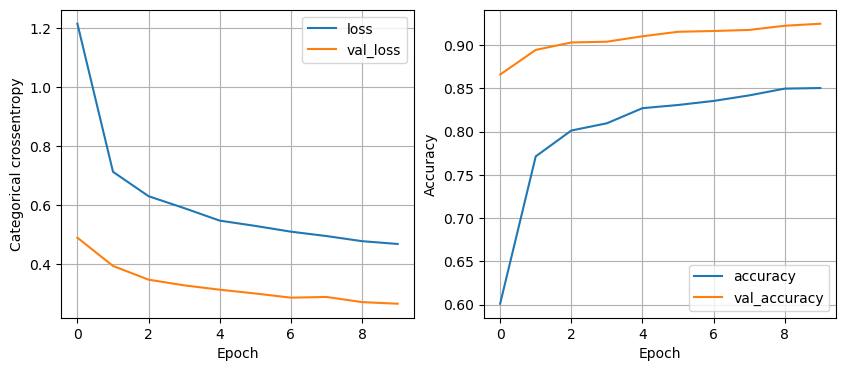

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 201us/step - accuracy: 0.9235 - loss: 0.2819
16 nodes, dropout 0.2, lr 0.001, batch size 32


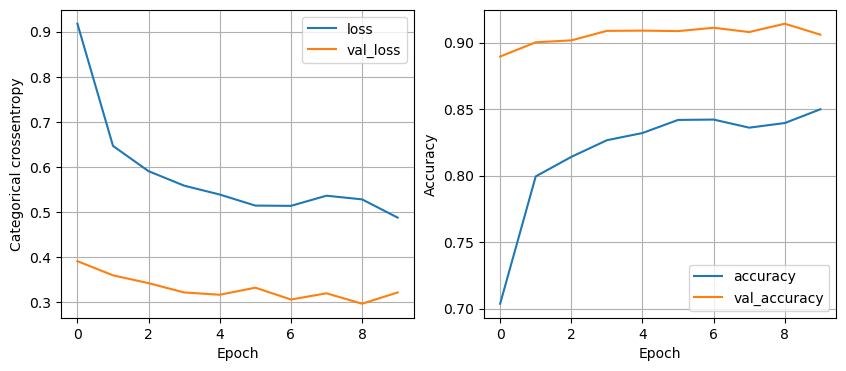

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 194us/step - accuracy: 0.9107 - loss: 0.3369
16 nodes, dropout 0.2, lr 0.001, batch size 64


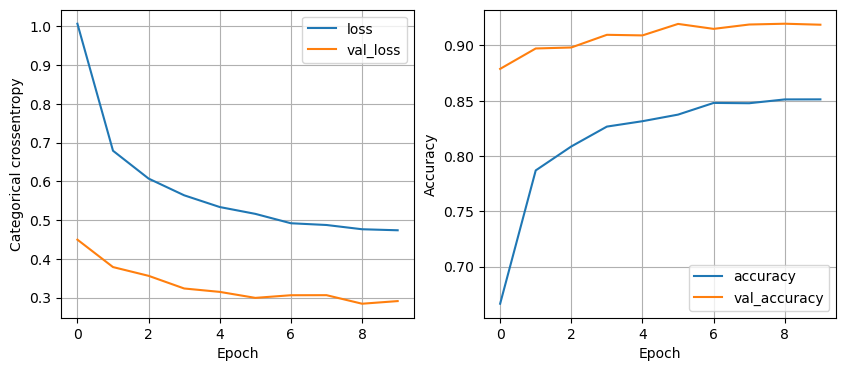

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 194us/step - accuracy: 0.9213 - loss: 0.3085
16 nodes, dropout 0.2, lr 0.001, batch size 128


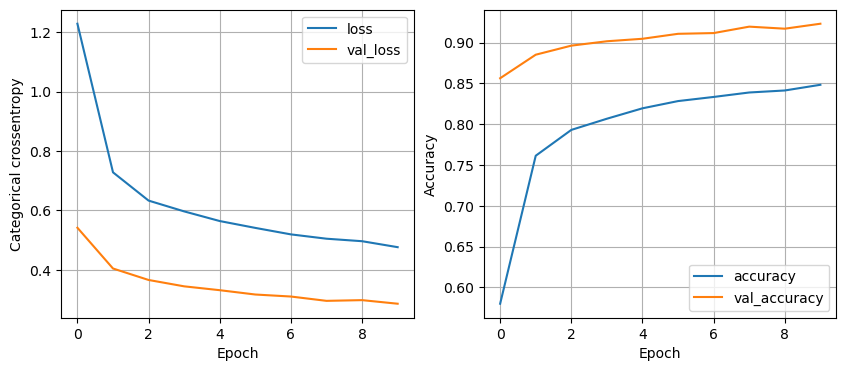

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 204us/step - accuracy: 0.9264 - loss: 0.2721
32 nodes, dropout 0, lr 0.01, batch size 32


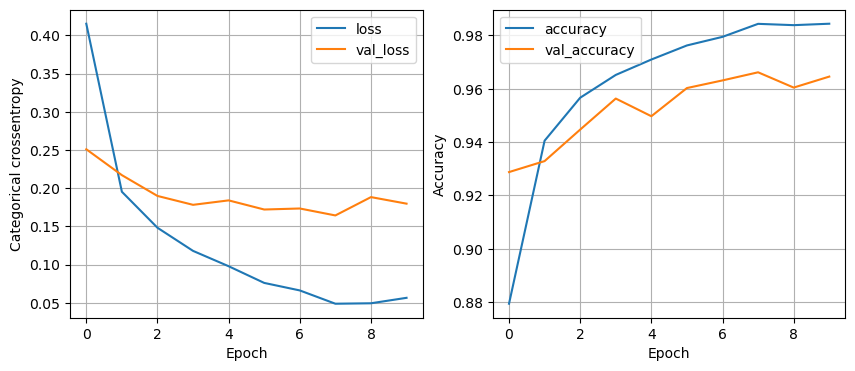

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step - accuracy: 0.9575 - loss: 0.2542
32 nodes, dropout 0, lr 0.01, batch size 64


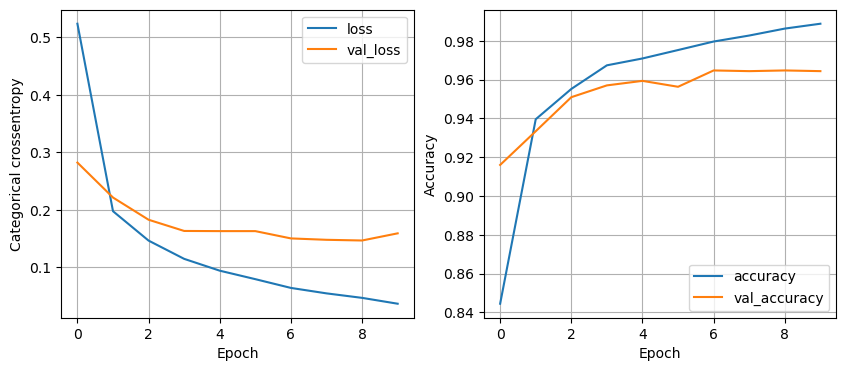

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 202us/step - accuracy: 0.9526 - loss: 0.2431
32 nodes, dropout 0, lr 0.01, batch size 128


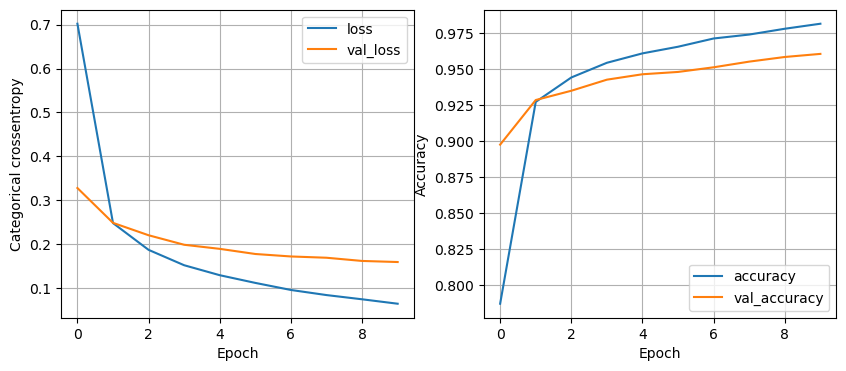

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step - accuracy: 0.9490 - loss: 0.1888
32 nodes, dropout 0, lr 0.005, batch size 32


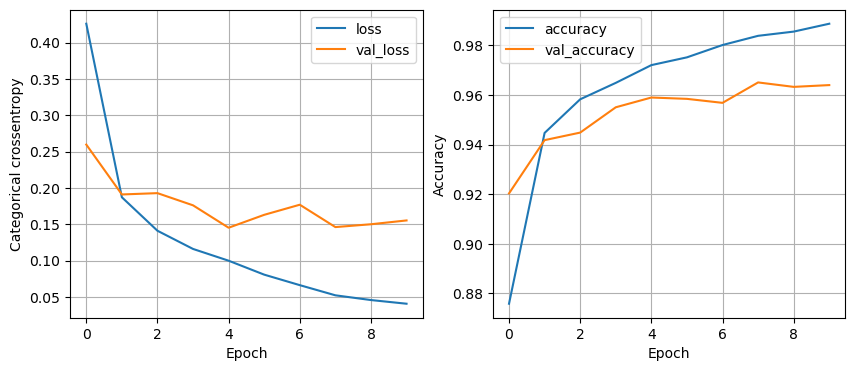

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 204us/step - accuracy: 0.9548 - loss: 0.2495
32 nodes, dropout 0, lr 0.005, batch size 64


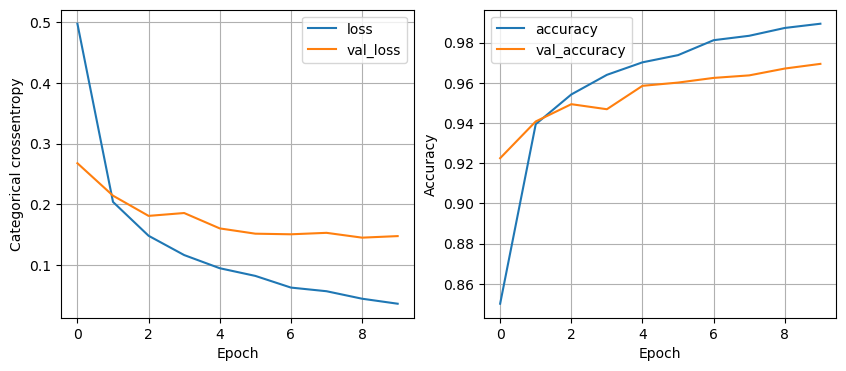

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 204us/step - accuracy: 0.9537 - loss: 0.2407
32 nodes, dropout 0, lr 0.005, batch size 128


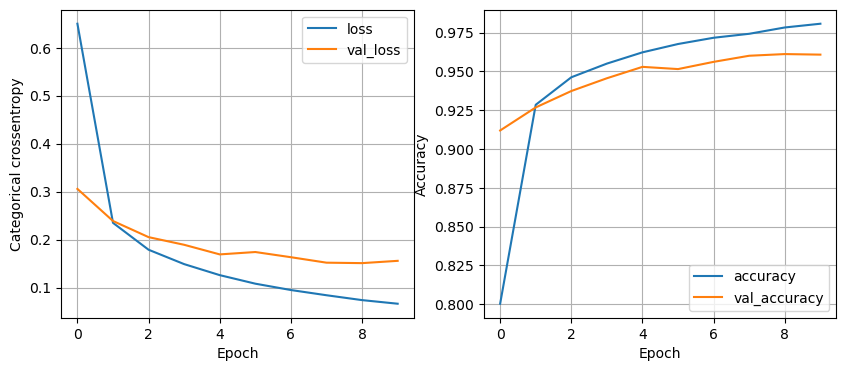

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 204us/step - accuracy: 0.9522 - loss: 0.1890
32 nodes, dropout 0, lr 0.001, batch size 32


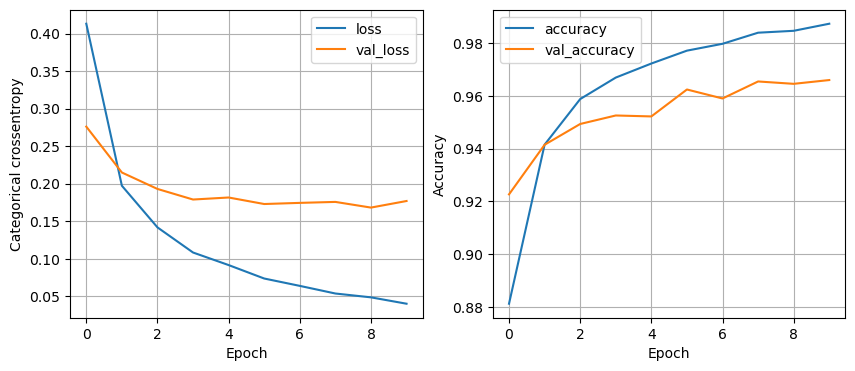

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 196us/step - accuracy: 0.9539 - loss: 0.2475
32 nodes, dropout 0, lr 0.001, batch size 64


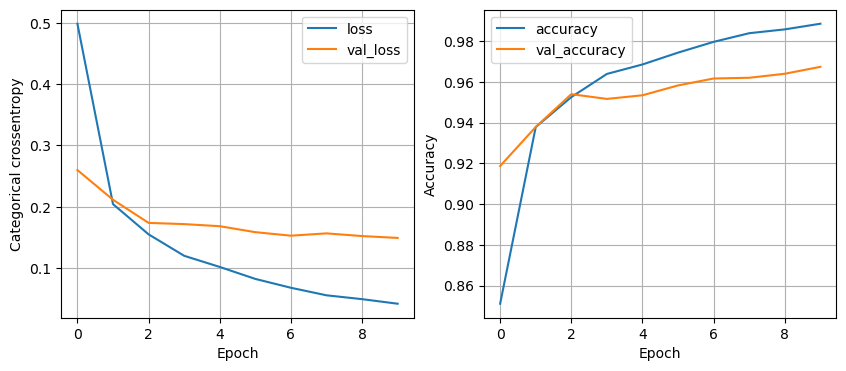

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step - accuracy: 0.9592 - loss: 0.1916
32 nodes, dropout 0, lr 0.001, batch size 128


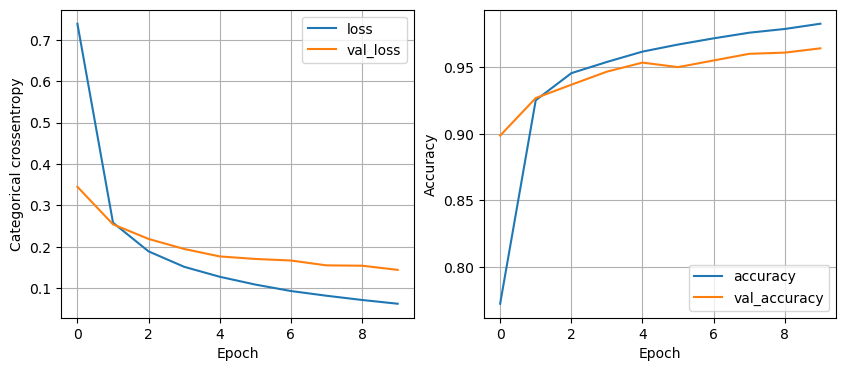

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step - accuracy: 0.9533 - loss: 0.1794
32 nodes, dropout 0.2, lr 0.01, batch size 32


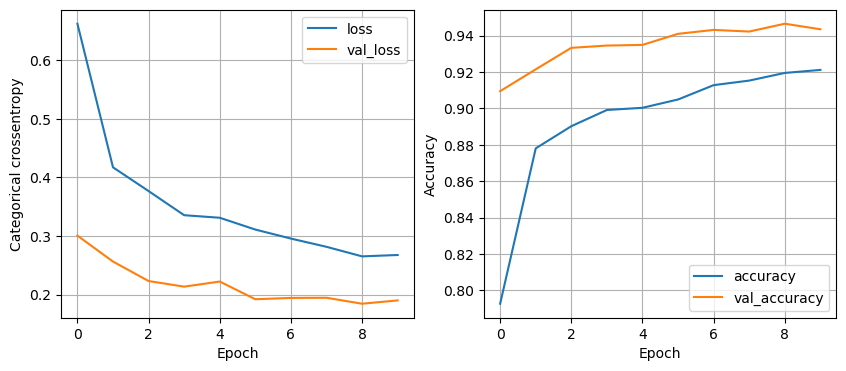

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 201us/step - accuracy: 0.9388 - loss: 0.2480
32 nodes, dropout 0.2, lr 0.01, batch size 64


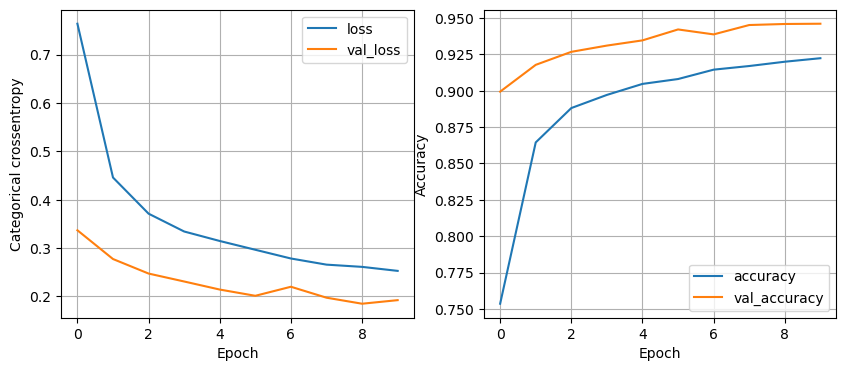

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 202us/step - accuracy: 0.9457 - loss: 0.2129
32 nodes, dropout 0.2, lr 0.01, batch size 128


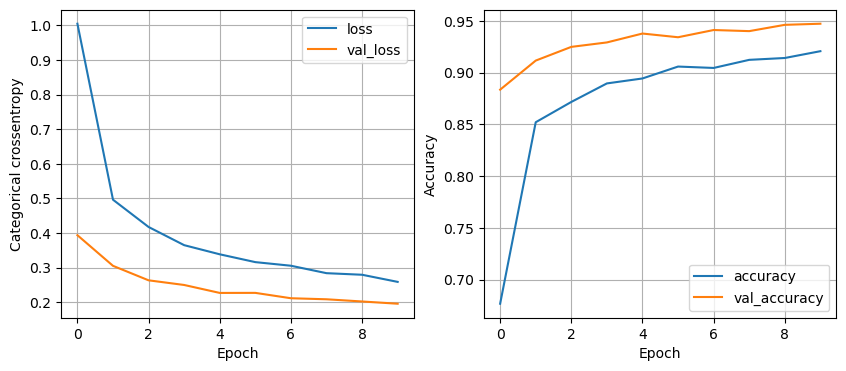

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step - accuracy: 0.9441 - loss: 0.2077
32 nodes, dropout 0.2, lr 0.005, batch size 32


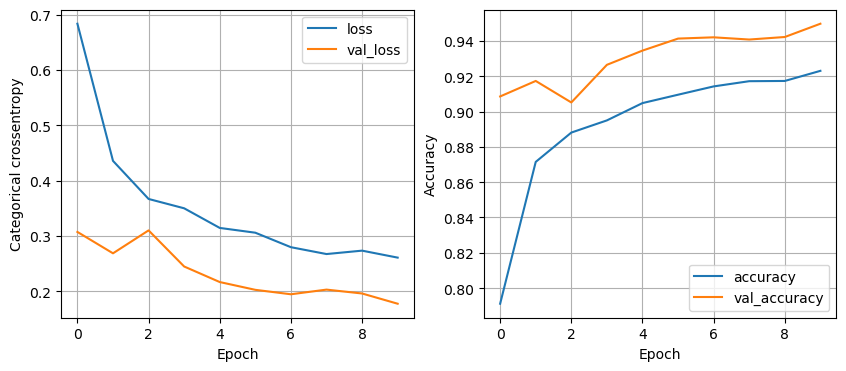

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step - accuracy: 0.9458 - loss: 0.2368
32 nodes, dropout 0.2, lr 0.005, batch size 64


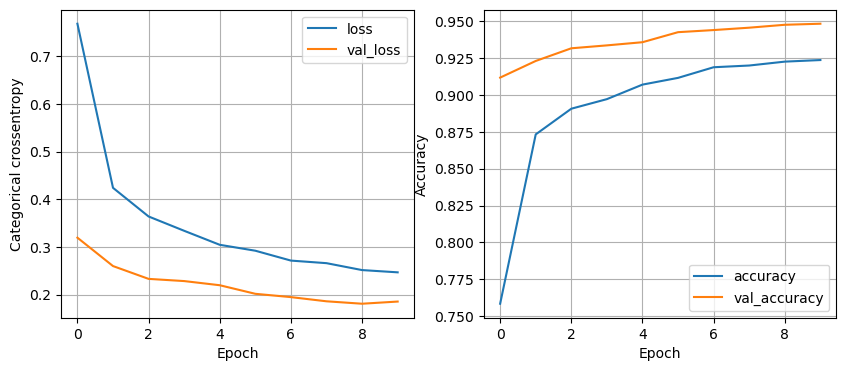

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step - accuracy: 0.9456 - loss: 0.2242
32 nodes, dropout 0.2, lr 0.005, batch size 128


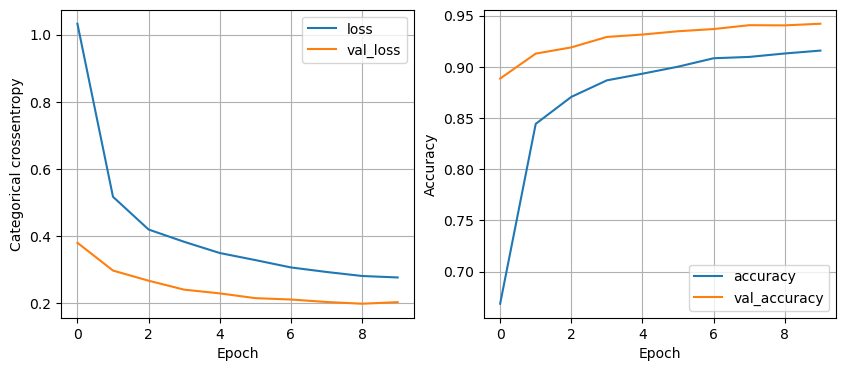

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step - accuracy: 0.9415 - loss: 0.2249
32 nodes, dropout 0.2, lr 0.001, batch size 32


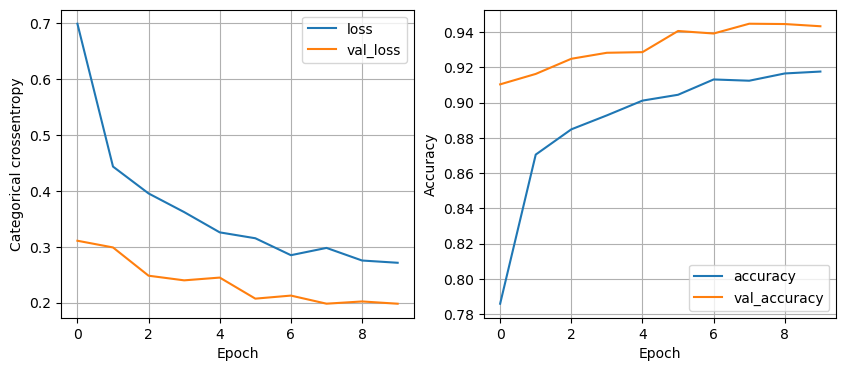

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 217us/step - accuracy: 0.9410 - loss: 0.2472
32 nodes, dropout 0.2, lr 0.001, batch size 64


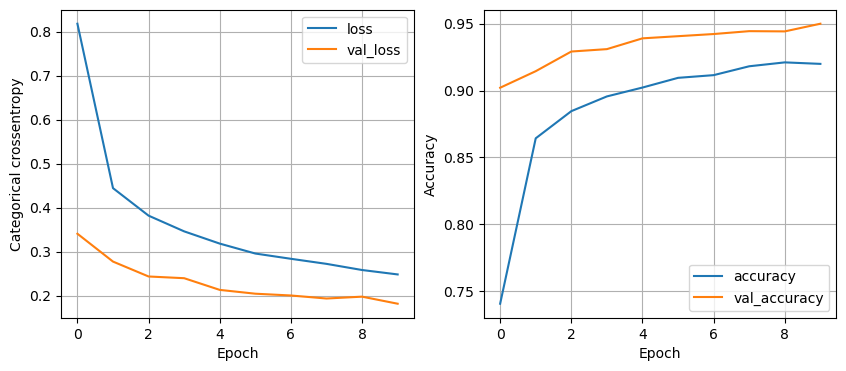

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 204us/step - accuracy: 0.9433 - loss: 0.2096
32 nodes, dropout 0.2, lr 0.001, batch size 128


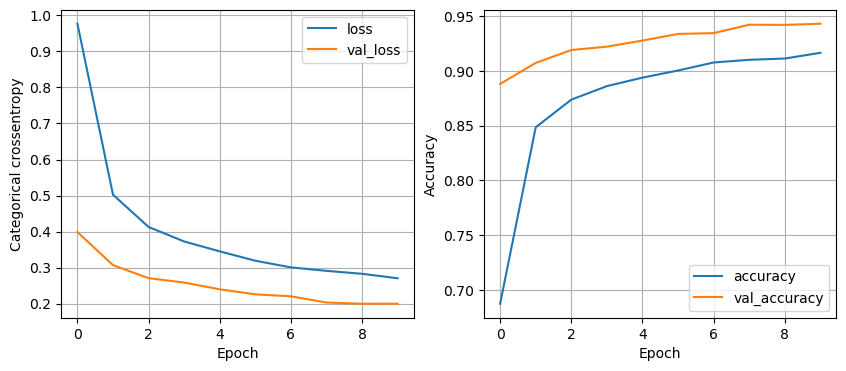

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step - accuracy: 0.9461 - loss: 0.1968
64 nodes, dropout 0, lr 0.01, batch size 32


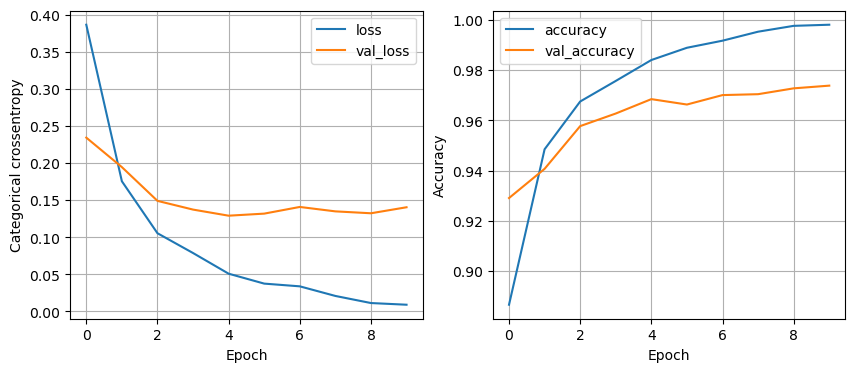

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - accuracy: 0.9674 - loss: 0.2284
64 nodes, dropout 0, lr 0.01, batch size 64


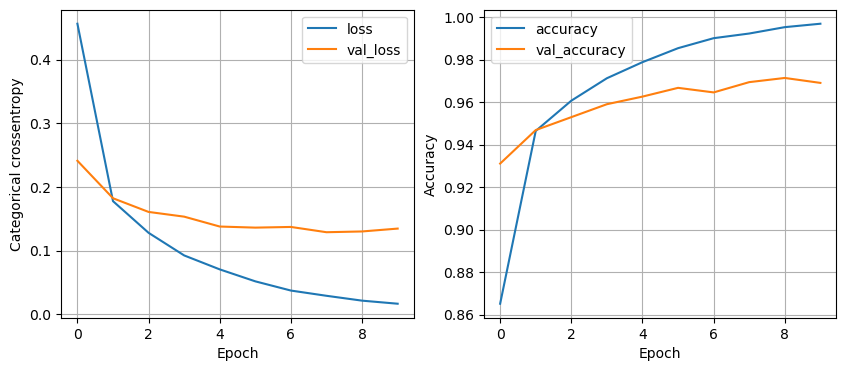

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - accuracy: 0.9631 - loss: 0.1756
64 nodes, dropout 0, lr 0.01, batch size 128


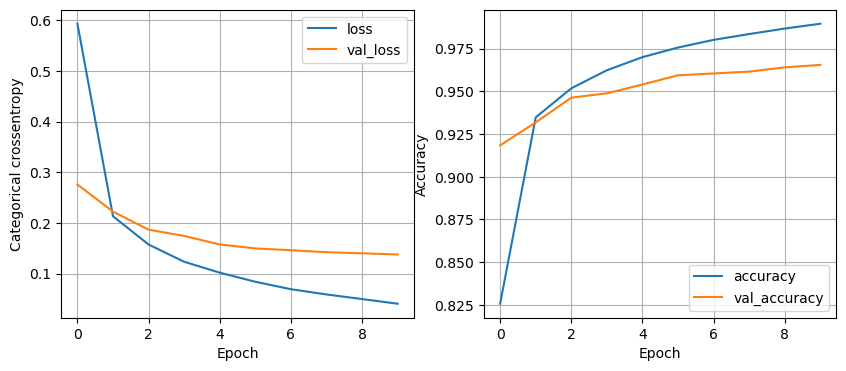

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - accuracy: 0.9588 - loss: 0.1592
64 nodes, dropout 0, lr 0.005, batch size 32


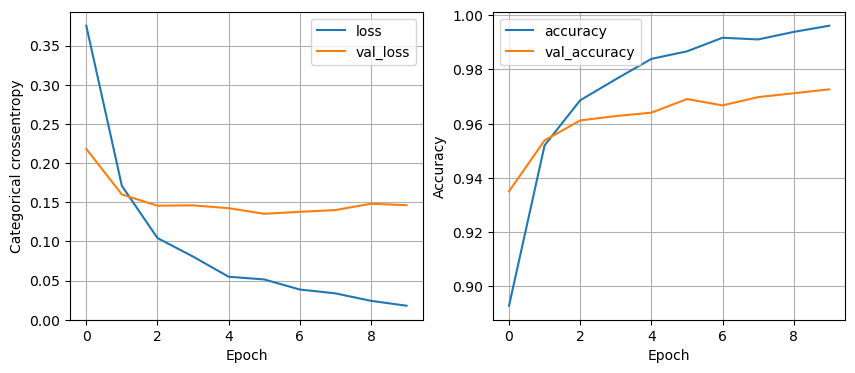

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - accuracy: 0.9620 - loss: 0.2327
64 nodes, dropout 0, lr 0.005, batch size 64


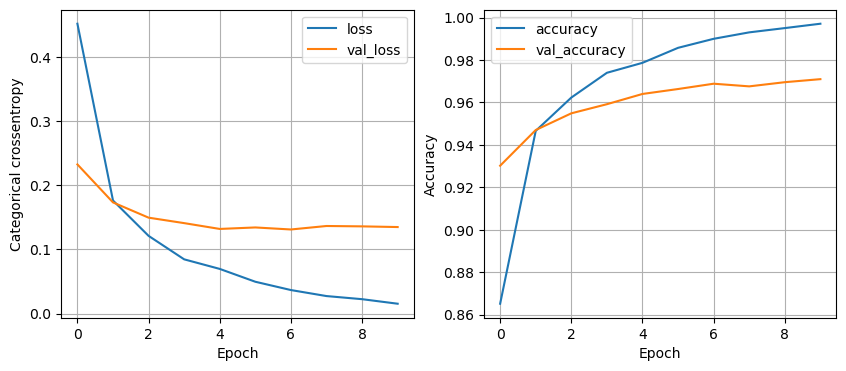

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - accuracy: 0.9619 - loss: 0.2055
64 nodes, dropout 0, lr 0.005, batch size 128


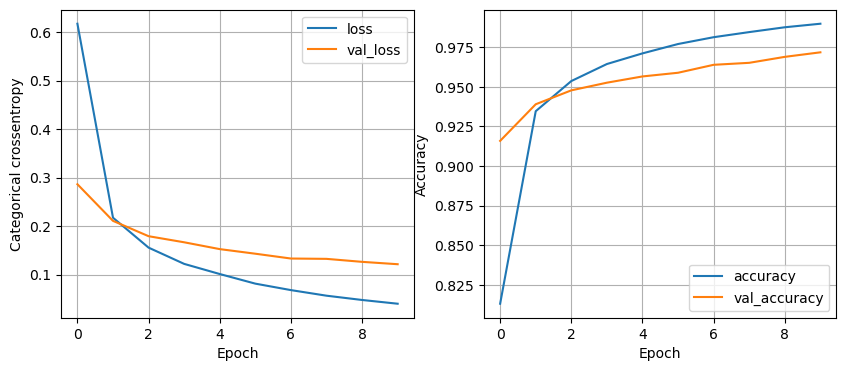

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - accuracy: 0.9581 - loss: 0.1747
64 nodes, dropout 0, lr 0.001, batch size 32


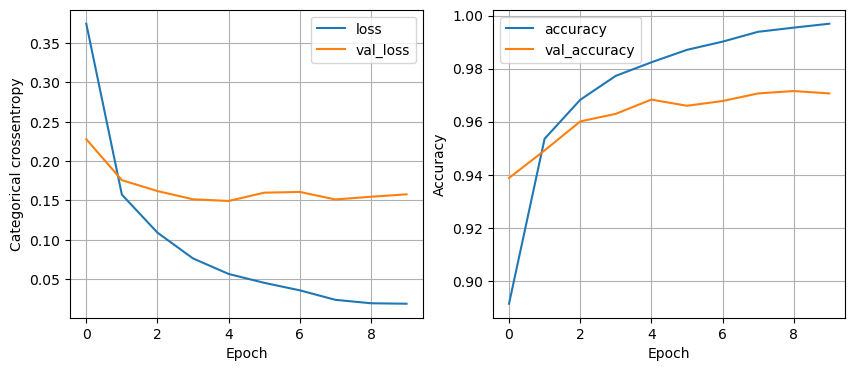

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - accuracy: 0.9626 - loss: 0.2035
64 nodes, dropout 0, lr 0.001, batch size 64


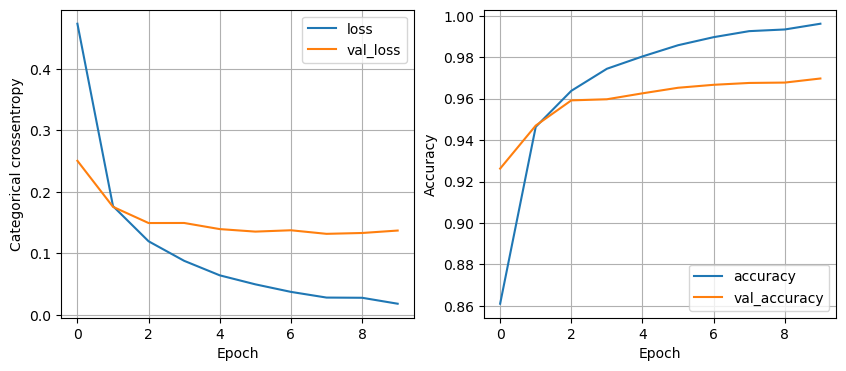

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - accuracy: 0.9626 - loss: 0.1758
64 nodes, dropout 0, lr 0.001, batch size 128


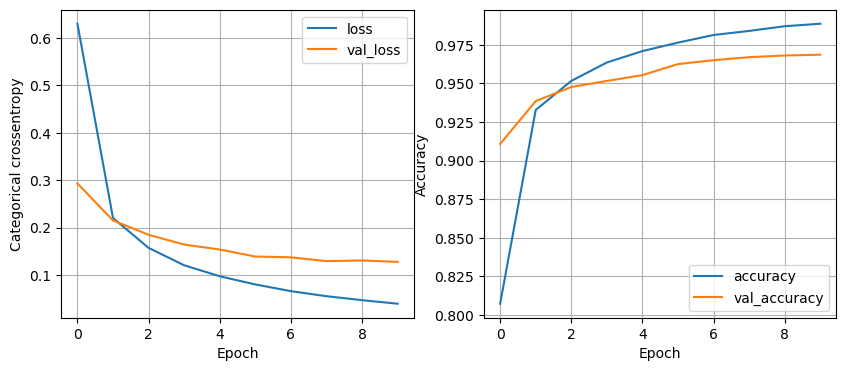

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - accuracy: 0.9601 - loss: 0.1684
64 nodes, dropout 0.2, lr 0.01, batch size 32


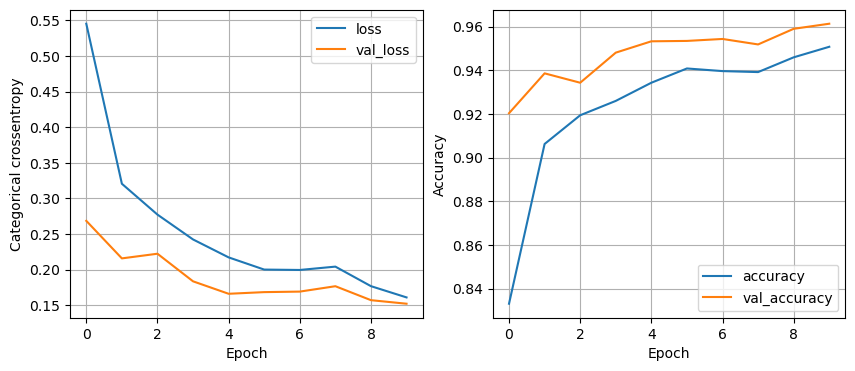

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - accuracy: 0.9577 - loss: 0.2209
64 nodes, dropout 0.2, lr 0.01, batch size 64


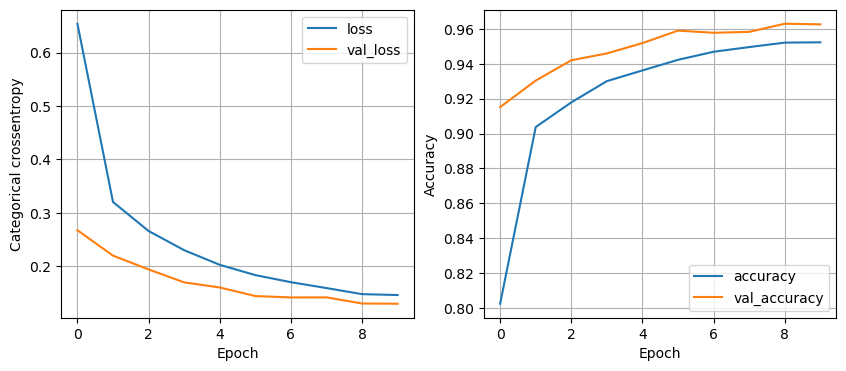

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - accuracy: 0.9579 - loss: 0.1866
64 nodes, dropout 0.2, lr 0.01, batch size 128


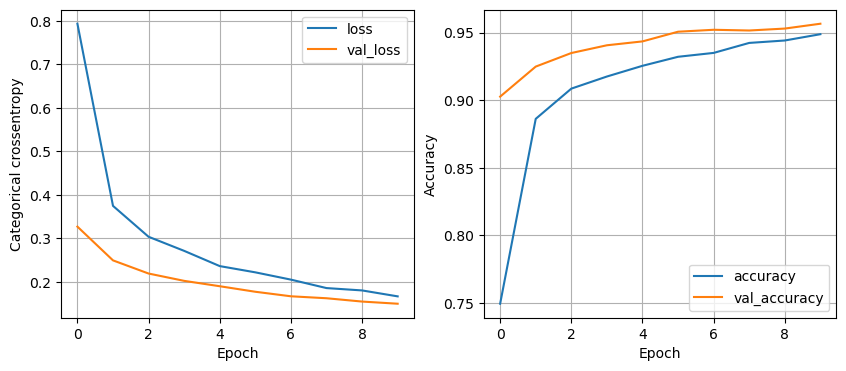

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - accuracy: 0.9543 - loss: 0.1702
64 nodes, dropout 0.2, lr 0.005, batch size 32


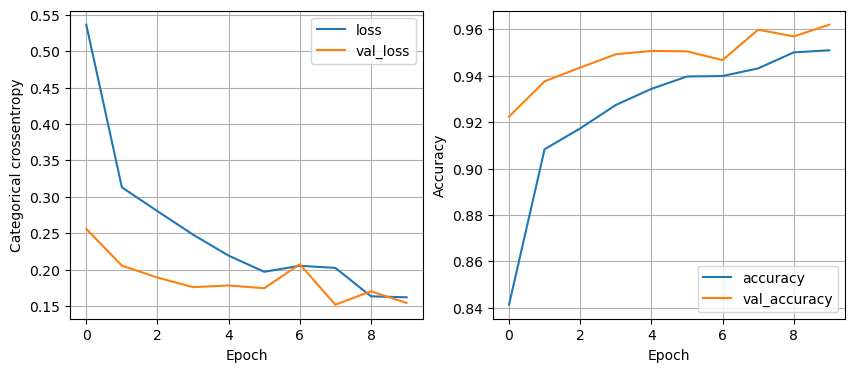

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - accuracy: 0.9601 - loss: 0.1842
64 nodes, dropout 0.2, lr 0.005, batch size 64


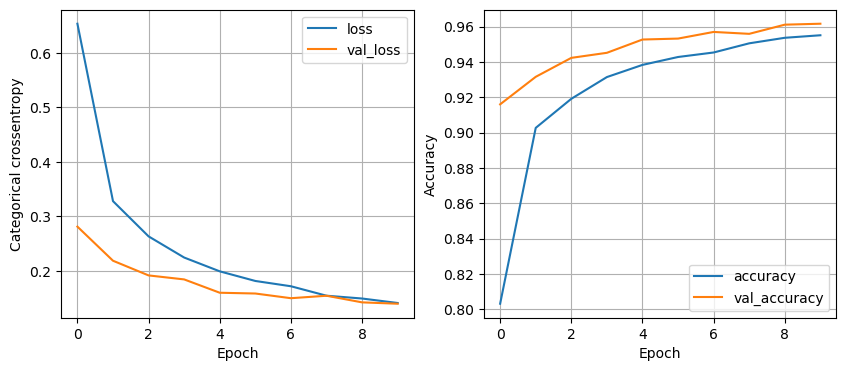

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - accuracy: 0.9577 - loss: 0.1829
64 nodes, dropout 0.2, lr 0.005, batch size 128


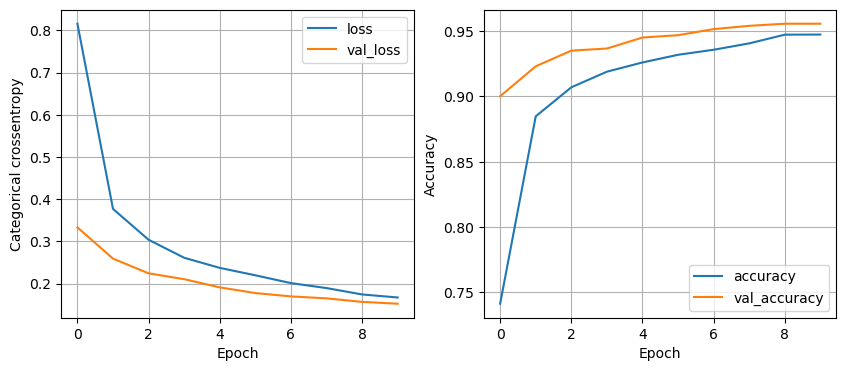

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - accuracy: 0.9545 - loss: 0.1759
64 nodes, dropout 0.2, lr 0.001, batch size 32


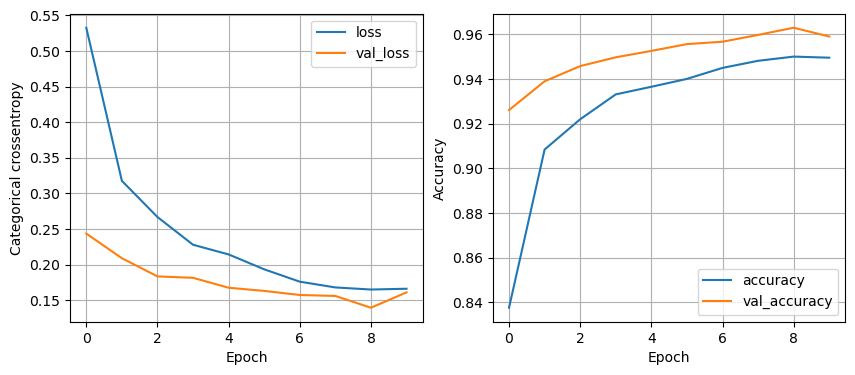

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - accuracy: 0.9578 - loss: 0.1895
64 nodes, dropout 0.2, lr 0.001, batch size 64


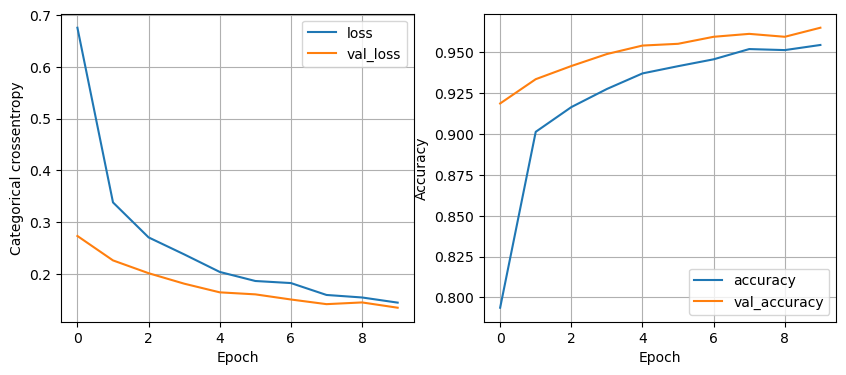

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - accuracy: 0.9573 - loss: 0.1855
64 nodes, dropout 0.2, lr 0.001, batch size 128


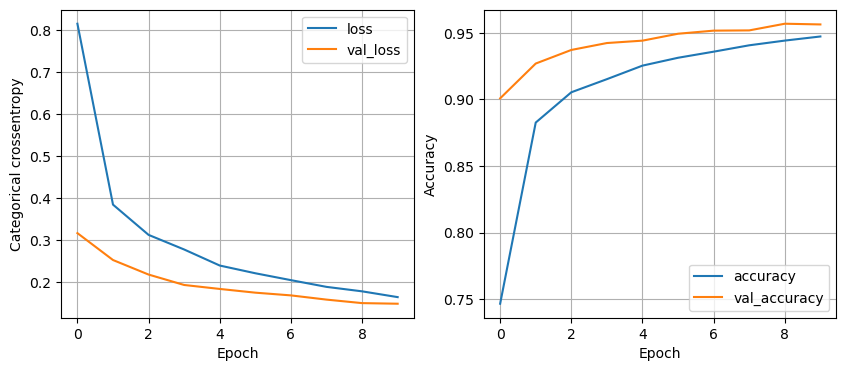

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - accuracy: 0.9548 - loss: 0.1754


In [22]:
least_val_loss = float('inf')
least_loss_model = None
epochs=10
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)
                if val_loss[0] < least_val_loss:
                    least_val_loss = val_loss[0]
                    least_loss_model = model

In [24]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       821
           1       0.98      0.97      0.97       939
           2       0.95      0.96      0.96       814
           3       0.95      0.94      0.94       885
           4       0.95      0.95      0.95       792
           5       0.96      0.93      0.94       717
           6       0.97      0.97      0.97       841
           7       0.95      0.96      0.96       941
           8       0.94      0.94      0.94       828
           9       0.94      0.91      0.93       822

   micro avg       0.96      0.95      0.95      8400
   macro avg       0.96      0.95      0.95      8400
weighted avg       0.96      0.95      0.95      8400
 samples avg       0.95      0.95      0.95      8400



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
accuracy_score(y_test, y_pred)

0.950952380952381

In [30]:
test = pd.read_csv('../input/test.csv')

In [32]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
test_predict = model.predict(test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step


In [36]:
test_predict

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        3.0244595e-13, 1.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [38]:
test_label = np.argmax(test_predict, axis=1)

In [40]:
test_label

array([2, 0, 9, ..., 3, 9, 2])

In [42]:
np.unique(test_label)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])